In [5]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.xarray
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

ImportError: Something is wrong with the numpy installation. While importing we detected an older version of numpy in ['C:\\Users\\TopMob\\Anaconda3\\lib\\site-packages\\numpy']. One method of fixing this is to repeatedly uninstall numpy until none is found, then reinstall this version.

# <font color=blue>_Centre Calibration from Field Rastering at $\phi = 0^\circ$ and $\phi = 90^\circ$_</font>

In [7]:
x_start, x_end, x_step = 25, 29, 0.05
y_start, y_end, y_step = 20, 24, 0.05
x_pts = np.arange(x_start, x_end+x_step, x_step)
y_pts = np.arange(y_start, y_end+y_step, y_step)

Import data from csv

In [3]:
phi0 = pd.read_csv('./2019-06-01/field_raster_fieldRaster_2019-06-01_5.csv', comment='#')
phi90 = pd.read_csv('./2019-06-01/field_raster_fieldRaster_2019-06-01_6.csv', comment='#')

Text(0.5, 1.0, 'phi0 xy plane field')

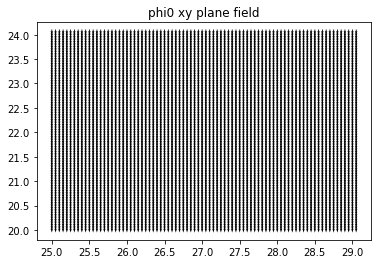

In [4]:
x = phi0['X']
y = phi0['Y']
z = [0]

x_field = phi0['Xfield_avg']
y_field = phi0['Yfield_avg']
z_field = phi0['Zfield_avg']

plt.quiver(x, y, x_field, y_field, pivot='middle', scale = 10)
plt.title('phi0 xy plane field')
#fig = plt.figure()
#ax = fig.add_subplot(111, projection ='3d')
#ax.quiver(x_pts, y_pts, z_pts, x_field, y_field, z_field, length = 0.9)

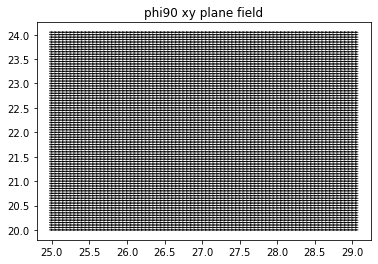

In [6]:
x = phi90['X']
y = phi90['Y']
z = [0]

x_field = phi90['Xfield_avg']
y_field = phi90['Yfield_avg']
z_field = phi90['Zfield_avg']
plt.title('phi90 xy plane field')
plt.quiver(x, y, x_field, y_field, pivot='middle', scale = 10)

In [8]:
#Data variables dict
phi0_data_vars = {}
phi90_data_vars = {}

#Add (dims, data) tuple for each variable column to dict
for var in phi0.columns[:]:
    dims = ["Xpos", "Ypos"]
    data0 = phi0[var].values.reshape(x_pts.size, y_pts.size)
    data90 = phi90[var].values.reshape(x_pts.size, y_pts.size)

    phi0_data_vars[var] = (dims, data0)
    phi90_data_vars[var] = (dims, data90)

coords = {"Xpos":('Xpos', x_pts), "Ypos":('Ypos', y_pts)}

phi0_ds = xr.Dataset(phi0_data_vars, coords)
phi90_ds = xr.Dataset(phi90_data_vars, coords)

In [137]:
phi0_ds.Yfield_avg.hvplot()

:Image   [Ypos,Xpos]   (Yfield_avg)

In [138]:
phi90_ds.Yfield_avg.hvplot()

:Image   [Ypos,Xpos]   (Yfield_avg)

In [139]:
phi90_ds.Xfield_avg.hvplot()

:Image   [Ypos,Xpos]   (Xfield_avg)

In [140]:
phi0_ds.Xfield_avg.hvplot()

:Image   [Ypos,Xpos]   (Xfield_avg)

In [9]:
phi0_ds.Zfield_avg.hvplot()

:Image   [Ypos,Xpos]   (Zfield_avg)

In [10]:
phi90_ds.Zfield_avg.hvplot()

:Image   [Ypos,Xpos]   (Zfield_avg)

In [11]:
combined_Z_field = (phi0_ds.Zfield_avg**2 + phi90_ds.Zfield_avg**2)

In [12]:
combined_Z_field.hvplot()

:Image   [Ypos,Xpos]   (Zfield_avg)

In [13]:
combined_Z_field.where(combined_Z_field == combined_Z_field.min(), drop=True)

<xarray.DataArray 'Zfield_avg' (Xpos: 1, Ypos: 1)>
array([[3.89532e-07]])
Coordinates:
  * Xpos     (Xpos) float64 27.4
  * Ypos     (Ypos) float64 22.15

In [14]:
combined_inplane = (phi0_ds.Yfield_avg**2 + phi90_ds.Xfield_avg**2)

In [15]:
combined_inplane.hvplot()

:Image   [Ypos,Xpos]   (value)

In [16]:
combined_inplane.where(combined_inplane == combined_inplane.max(), drop=True)

<xarray.DataArray (Xpos: 1, Ypos: 1)>
array([[0.056975]])
Coordinates:
  * Xpos     (Xpos) float64 27.5
  * Ypos     (Ypos) float64 22.25

# Centres
z field (27.41, 22.32), y field (27.42, 22.44)

In [17]:
phi0_phi = np.arctan2(phi0_ds.Xfield_avg, phi0_ds.Yfield_avg)
phi90_phi = np.arctan2(phi90_ds.Yfield_avg, phi90_ds.Xfield_avg)
theta0_phi = np.arctan2(np.sqrt(phi0_ds.Xfield_avg**2 + phi0_ds.Yfield_avg**2), phi0_ds.Zfield_avg)
theta90_phi = np.arctan2(np.sqrt(phi90_ds.Xfield_avg**2 + phi90_ds.Yfield_avg**2), phi90_ds.Zfield_avg)

In [18]:
print('phi0 : phi = %1.2f' % (phi0_phi.sel(Xpos=27.41, Ypos=22.38, method='backfill').values*180/np.pi))
print('phi90 : phi = %1.2f' % (phi90_phi.sel(Xpos=27.41, Ypos=22.48, method='backfill').values*180/np.pi))

phi0 : phi = -179.11
phi90 : phi = -0.40


In [19]:
print('phi0 : theta = %1.2f' % (theta0_phi.sel(Xpos=27.41, Ypos=22.38, method='backfill').values*180/np.pi))
print('phi90 : theta = %1.2f' % (theta90_phi.sel(Xpos=27.41, Ypos=22.48, method='backfill').values*180/np.pi))

phi0 : theta = 89.74
phi90 : theta = 92.80


$\phi_0$ $\phi$ = -179$^\circ$, $\theta$ = 89.99$^\circ$
$\phi_{90}$ $\phi$ = -0.44$^\circ$, $\theta$ = 92.14$^\circ$